<a href="https://colab.research.google.com/github/eman-1111/BlackFridayAnalytics/blob/master/BlackFridayClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

First, we read the csv file as a Pnadas dataframe. The dataset is available on Kaggle


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
black_friday_data = pd.read_csv("./drive/My Drive/BlackFriday.csv")
black_friday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


There are some missing values. Let's find out which columns have missing values and how many of them are there

In [16]:
for column_name in black_friday_data.columns:
    missing_value = black_friday_data[column_name].isnull().sum()
    print(column_name, missing_value)

User_ID 0
Product_ID 0
Gender 0
Age 0
Occupation 0
City_Category 0
Stay_In_Current_City_Years 0
Marital_Status 0
Product_Category_1 0
Product_Category_2 166986
Product_Category_3 373299
Purchase 0


We will have to take this in consideration in our feature engineering phase. If we intend to keep these columns however, then we need to replace the missing values by something our **deep nerual network can recognize**. Since both columns represent categorical data, we can create a new category that represent missing values.

As you can see these columns represent their categories using integer values. Let's examine how many categories are there

In [17]:
unique_categories = []
for col_name in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    unique_categories += list(black_friday_data[col_name].unique())
set(unique_categories)

{nan, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, nan}

Looks like the categories start at 1, so we can use 0 to represent missing information

In [18]:
black_friday_data['Product_Category_2'].fillna(0, inplace=True)
black_friday_data['Product_Category_3'].fillna(0, inplace=True)
black_friday_data['Gender'].replace(('M', 'F'), (1, 0), inplace=True)

black_friday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969


In [0]:
# # black_friday_data = black_friday_data.groupby(['User_ID','Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status','Occupation'])['Product_Category_1'].agg('max')
# black_friday_data = black_friday_data.groupby(['User_ID','Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status','Occupation','Product_Category_1']).agg({'Purchase':'sum'})
# # black_friday_data = black_friday_data.to_frame().reset_index()
# black_friday_data = black_friday_data.add_suffix('').reset_index()
# black_friday_data


see

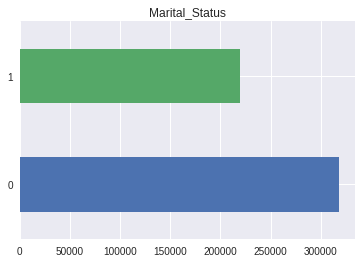

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

black_friday_data['Marital_Status'].value_counts().plot(kind='barh', title='Marital_Status')

In [0]:
# black_friday_data.drop(black_friday_data.query('Marital_Status == 0').sample(frac=.7).index)
black_friday_data = black_friday_data.drop(black_friday_data.query('Marital_Status == 0').sample(frac=0.3).index)

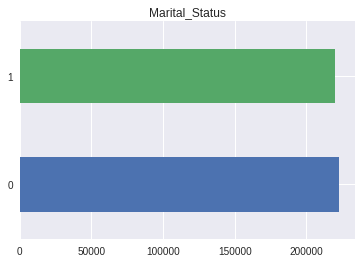

In [21]:
black_friday_data['Marital_Status'].value_counts().plot(kind='barh', title='Marital_Status')

# Deep neural network 




### one-hot encoding

use one-hot encoding on categorical data so it would be eaiser for nerual network  to find correlation, nerual network  require numerical input and output variables

In [22]:
data = black_friday_data

dummy_fields = [ 'City_Category','Stay_In_Current_City_Years','Age']
for each in dummy_fields:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

fields_to_drop = ['User_ID','Product_ID','City_Category','Stay_In_Current_City_Years','Age']
data = data.drop(fields_to_drop, axis=1)
data.head()


,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,10,0,3,0.0,0.0,8370,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,10,0,1,6.0,14.0,15200,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,10,0,12,14.0,0.0,1057,1,0,0,...,1,0,0,1,0,0,0,0,0,0
5,1,15,0,1,2.0,0.0,15227,1,0,0,...,0,1,0,0,0,1,0,0,0,0
6,1,7,1,1,8.0,17.0,19215,0,1,0,...,1,0,0,0,0,0,0,1,0,0


### Normalize Data
Reduce differences in the ranges of values,to make training faster .

For **Purchase** standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

For the rest, we divide on the max number so the value be between 0 to 1

In [23]:
mean, std = data["Purchase"].mean(), data["Purchase"].std()
data.loc[:, "Purchase"] = (data["Purchase"] - mean)/std

data["Product_Category_1"] = data["Product_Category_1"] / 18
data["Product_Category_2"] = data["Product_Category_2"] / 18
data["Product_Category_3"] = data["Product_Category_3"] / 18
data["Occupation"] = data["Occupation"] / 20

data.head()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,0.50,0,0.166667,0.000000,0.000000,-0.194365,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0.50,0,0.055556,0.333333,0.777778,1.177655,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0.50,0,0.666667,0.777778,0.000000,-1.663411,1,0,0,...,1,0,0,1,0,0,0,0,0,0
5,1,0.75,0,0.055556,0.111111,0.000000,1.183079,1,0,0,...,0,1,0,0,0,1,0,0,0,0
6,1,0.35,1,0.055556,0.444444,0.944444,1.984194,0,1,0,...,1,0,0,0,0,0,0,1,0,0


### Splitting the data into training, testing, and validation sets

We'll save approximately 40% data as validation and test set after we've trained the network. We'll use this set to make predictions and compare them with the actual numbers.

Then Separate the data into features and targets.



In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
train, validation = train_test_split(train, test_size=0.2)


target_fields = ['Marital_Status']

train_features, train_targets = train.drop(target_fields, axis=1), train[target_fields]
validation_features, validation_targets = validation.drop(target_fields, axis=1), validation[target_fields]
test_features, test_targets = test.drop(target_fields, axis=1), test[target_fields]

### Import the deep learning libraries

Keras is a high level API built on TensorFlow, to build and test a neural network with minimal lines of code

In [0]:
!pip install -q keras_metrics

In [0]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import precision_score, recall_score
import keras as kr
import keras_metrics


### Time to build the network

The network has three layers, two hidden layer and one output layer. The hidden layers will use the sigmoid function for activations.the first hidden layers 19 neural and the second hidden layers has 16 neural.

The output layer has only one node and is used for the classification **zero or one** so it also will use sigmoid function, the activation function is $f(x)=(1/(1 + \exp(-x)))$. 

I Use **binary_crossentropy** because every output is independent, not mutually exclusive and can take values 0 or 1 
Hy′(y):=−∑iy′ilog(yi) yi is the predicted probability value for class i and y′i is the true probability for that class.

The **Adam optimization** algorithm is an extension to stochastic gradient descent to update network weights iterative based in training data.
It has many benefits but what we need is that its  Appropriate for problems with very noisy/or sparse gradients, Well suited for problems that are large in terms of data and/or parameters and Little memory requirements.

The method computes individual **adaptive learning rates** for different parameters from estimates of first and second moments of the gradients.


Precision and recall are then defined as

$Precision=tp / (tp+fp)$. 


$Recall= tp/ (tp + fn)$. 

We included  using  to our test **keras_metrics**

In [27]:
model = Sequential()
model.add(Dense(19, input_dim=train_features.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(16))
model.add(Activation("sigmoid"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

learning_rate = 0.9
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum)

model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=[keras_metrics.precision(), keras_metrics.recall(), 'accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 19)                418       
_________________________________________________________________
activation_1 (Activation)    (None, 19)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                320       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 755
Trainable params: 755
Non-trainable params: 0
_________________________________________________________________


We included validation_data so **keras** make sure not to overfit

In [28]:
history = model.fit(train_features, train_targets, epochs=500,batch_size=1024,  validation_data=(validation_features, validation_targets))


Train on 283028 samples, validate on 70757 samples
Epoch 1/500
283028/283028 [==============================] - 3s 11us/step - loss: 0.6473 - precision: 0.6091 - recall: 0.5324 - acc: 0.5979 - val_loss: 0.6350 - val_precision: 0.7702 - val_recall: 0.3268 - val_acc: 0.6176
Epoch 2/500
283028/283028 [==============================] - 2s 8us/step - loss: 0.6292 - precision: 0.6372 - recall: 0.5295 - acc: 0.6164 - val_loss: 0.6267 - val_precision: 0.5998 - val_recall: 0.6550 - val_acc: 0.6120
Epoch 3/500
283028/283028 [==============================] - 2s 8us/step - loss: 0.6261 - precision: 0.6397 - recall: 0.5413 - acc: 0.6206 - val_loss: 0.6255 - val_precision: 0.5930 - val_recall: 0.7620 - val_acc: 0.6224
Epoch 4/500
283028/283028 [==============================] - 2s 8us/step - loss: 0.6231 - precision: 0.6419 - recall: 0.5698 - acc: 0.6283 - val_loss: 0.6215 - val_precision: 0.6779 - val_recall: 0.4842 - val_acc: 0.6299
Epoch 5/500
283028/283028 [==============================] - 2s 

In [29]:
score = model.evaluate(test_features, test_targets)
print("\nAccuracy: ", score[-1])


88447/88447 [==============================] - 10s 116us/step

Accuracy:  0.7597883478160339


In [30]:
# list all data in history
print(history.history.keys())


dict_keys(['val_loss', 'val_precision', 'val_recall', 'val_acc', 'loss', 'precision', 'recall', 'acc'])


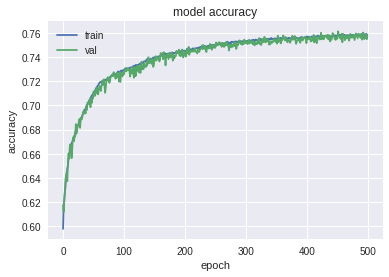

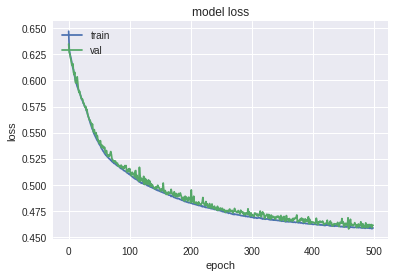

In [31]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Random forest

is a powerful method for regression and classification.

To make a prediction, the random forest considers the predictions of several trees. It would not, however, be useful to have many identical trees because all these trees would presumably give you the same prediction, this is why the trees in the forest are randomized.

So Bagging, in the context of decision trees, means that we draw a number of bootstrap datasets and fit each to a tree.

And to avoid overfitting we set it to 5 trees,The maximum depth of the tree 13.

The function to measure the quality of a split. “entropy” for the information gain.

###  Integer Encoding

Use **LabelEncoder** to transfer our data to integer valuse 

In [32]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df = black_friday_data.apply(LE.fit_transform)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,666,0,0,10,0,2,0,2,0,0,6512
1,0,2363,0,0,10,0,2,0,0,5,11,11764
3,0,818,0,0,10,0,2,0,11,13,0,373
5,2,1820,1,2,15,0,3,0,0,1,0,11791
6,3,1734,1,4,7,1,2,1,0,7,14,14715


### Splitting the data into training, testing, and validation sets

We'll save approximately 20% data as test set after we've trained the network. We'll use this set to make predictions and compare them with the actual numbers.

Then Separate the data into features and targets.

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df , test_size=0.2)

target_fields = ['Marital_Status']

train_features, train_targets = train.drop(target_fields, axis=1), train[target_fields]
test_features, test_targets = test.drop(target_fields, axis=1), test[target_fields]

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=12)
clf.fit(train_features, train_targets)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

As you can see it gives us high Accuracy.

In [35]:
print("As you can see it gives us high Accuracy Score of Random Forests on test set",clf.score(test_features, test_targets)*100)


As you can see it gives us high Accuracy Score of Random Forests on test set 82.1644600721336


#  Naive Bayes Classifier

The Naive Bayes Classifier technique is based on the so-called Bayesian theorem and is particularly suited when the dimensionality of the inputs is high like in our case. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.


To demonstrate the concept of Naïve Bayes Classification.
As indicated, the objects can be classified as either **single or married**. Our task is to classify new cases as they arrive, decide to which class label they belong, based on the currently exiting objects.

Since there are more as many **single** objects as **married**, it is reasonable to believe that a new case (which hasn't been observed yet) is more as likely to have membership **single** rather than **married**. In the Bayesian analysis, this belief is known as the prior probability. Prior probabilities are based on previous experience, in this case the percentage of **single or married** objects, and often used to predict outcomes before they actually happen.



In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [37]:
model = GaussianNB()


model.fit(train_features, train_targets)

predicted_labels = model.predict(test_features)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print ("FINISHED classifying. accuracy score : ",accuracy_score(test_targets, predicted_labels))

FINISHED classifying. accuracy score :  0.6144583762026976
